In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
df = pd.read_json(path_or_buf='../../had_experiments/ChaosNLI/data/chaosNLI_v1.0/chaosNLI_snli.jsonl', lines=True)

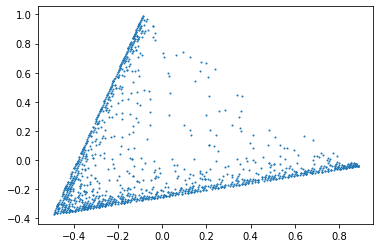

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
poss = np.array([x for x in df.label_dist.values])
poss = PCA(2).fit_transform(poss)
ax.scatter(poss[:,0], poss[:,1], s=1)

In [4]:
# Entail-Neutral and Contradict-Neutral pairs
EN = [x[0] > x[2] for x in df.label_dist] # If Entail > Contradict it is Entail-Neutral
CN = [x[0] <= x[2] for x in df.label_dist]

all_probs = np.array([x for x in df.label_dist.values])
EN_prob = all_probs[EN]
CN_prob = all_probs[CN]

In [5]:
# Normalized probability for only EN or CN
# CN [p1,p2,p3] --> [0,p2/(p2+p3),p3/(p2+p3)]
# EN [p1,p2,p3] --> [p1/(p1+p2),p2/(p1+p2),0]
CN_convert = CN_prob[:,1:] / np.sum(CN_prob[:,1:], axis=1, keepdims=1)
EN_convert = EN_prob[:,:-1] / np.sum(EN_prob[:,:-1], axis=1, keepdims=1)

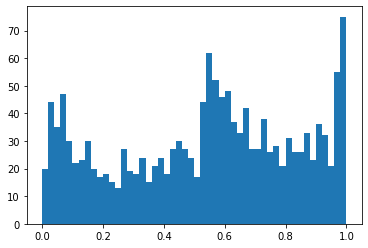

In [9]:
est_uncertainty = np.concatenate([CN_convert[:,1]/2, EN_convert[:,0]/2 + 0.5])
_, _, _ = plt.hist(est_uncertainty, bins=50)

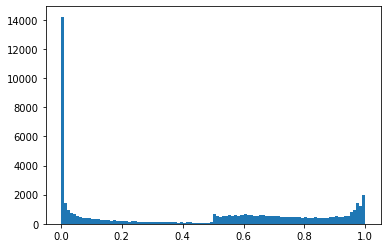

In [22]:
# Plot Unli distribution
df_unli = pd.read_csv('../../had_experiments/unli/out/uSnliCsv/Baseline.baseline/out/train.csv')
_ = plt.hist(df_unli.unli, bins=100)

In [8]:
converted_unli = []

for ex in df_unli.unli:
    if ex < 0.5:
        label_count = [0.0, 2 * ex, 1 - 2 * ex]
    else:
        label_count = [2 * ex - 1, 2 * (1 - ex), 0.0]
        
    converted_unli.append(label_count)
    
converted_unli = np.array(converted_unli)

In [10]:
chaos_probs = np.array([x for x in df.label_dist.values])

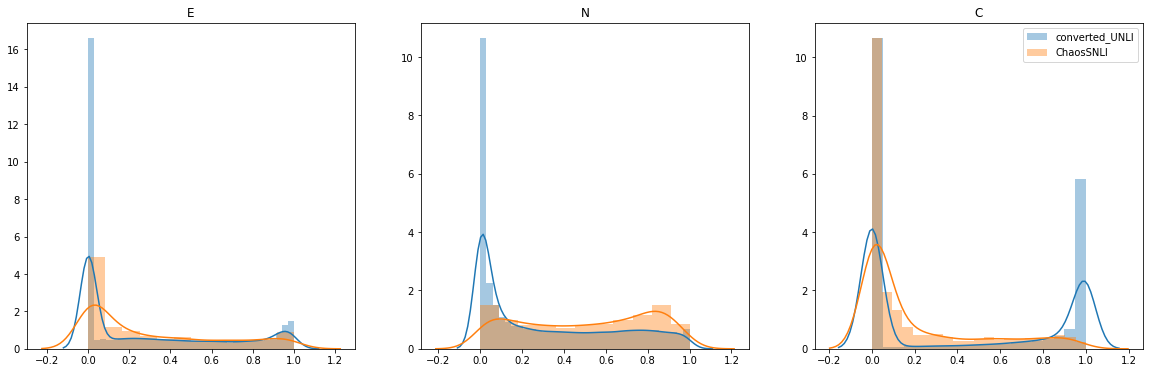

In [21]:
# Convert UNLI --> ChaosNLI

figs, axes = plt.subplots(1, 3, figsize=(20,6))
labels = ['E', 'N', 'C']


for i in range(3):
    sns.distplot(converted_unli[:,i],ax=axes[i],label='converted_UNLI')
    sns.distplot(chaos_probs[:,i],ax=axes[i],label='ChaosSNLI')
    axes[i].set_title(labels[i])
    
plt.legend()

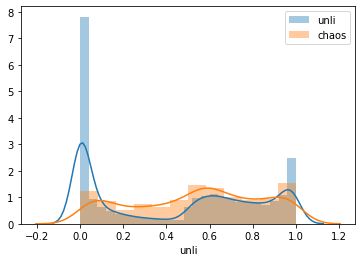

In [11]:
# Convert Chaos --> UNLI

sns.distplot(df_unli.unli, label='unli')
sns.distplot(est_uncertainty, label='chaos')
plt.legend()

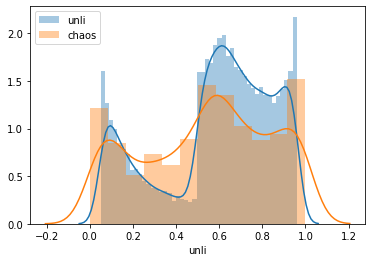

In [13]:
# Convert Chaos --> UNLI
# Filter out extreme values

sns.distplot(df_unli[(df_unli.unli > 0.05) & (df_unli.unli < 0.96)].unli, label='unli')
sns.distplot(est_uncertainty, label='chaos')
plt.legend()

# For Recording files (Not related)

In [85]:
pd.set_option('display.max_colwidth', None)
tmp = pd.DataFrame(data=df[['example', 'entropy']].sort_values(
    'entropy', ascending=False)['example'].tolist()).merge(
    df[['uid', 'label_dist','old_label']], on='uid').drop('uid',axis=1)
tmp['premise_implicature'] = ""
tmp['hypothesis_implicature'] = ""
tmp.to_json("all_pairs.json", orient='records', lines=True)

In [93]:
df.label_dist.iloc[1], df.label_dist.iloc[5]

([0.03, 0.9400000000000001, 0.03], [0.02, 0.77, 0.21])

In [99]:
def kl_diver(base, prob):
    eps = 1e-6
    return -np.sum(base * np.log(np.array(prob) + eps))

In [ ]:
kl_diver(np.array([0.5,0.5,0.]), row)

In [105]:
# EN pairs
kl_EN = []

for row in df.label_dist.values:
    kl_EN.append(kl_diver(np.array([0.5,0.5,0.]), row))
    
df['kl_en'] = kl_EN

# CN pairs
kl_CN = []

for row in df.label_dist.values:
    kl_CN.append(kl_diver(np.array([0.,0.5,0.5]), row))
    
df['kl_cn'] = kl_CN

In [107]:
pd.set_option('display.max_colwidth', None)
tmp = pd.DataFrame(data=df[['example', 'kl_en']].sort_values(
    'kl_en')['example'].tolist()).merge(
    df[['uid', 'label_dist','old_label']], on='uid').drop('uid',axis=1)
tmp['premise_implicature'] = ""
tmp['hypothesis_implicature'] = ""
tmp.to_json("EN_order.json", orient='records', lines=True)

In [108]:
pd.set_option('display.max_colwidth', None)
tmp = pd.DataFrame(data=df[['example', 'kl_cn']].sort_values(
    'kl_cn')['example'].tolist()).merge(
    df[['uid', 'label_dist','old_label']], on='uid').drop('uid',axis=1)
tmp['premise_implicature'] = ""
tmp['hypothesis_implicature'] = ""
tmp.to_json("CN_order.json", orient='records', lines=True)

In [103]:
kl_diver(np.array([0.,0.5,0.5]), [0.,0.5,0.5])

0.6931451805619453

In [47]:
pca_model = PCA(2)

pca_model.fit_transform(poss)

In [38]:
np.array([x for x in df.label_dist.values])

array([[0.3 , 0.7 , 0.  ],
       [0.03, 0.94, 0.03],
       [0.98, 0.02, 0.  ],
       ...,
       [0.13, 0.82, 0.05],
       [0.  , 0.13, 0.87],
       [0.1 , 0.76, 0.14]])